<a href="https://colab.research.google.com/github/Daniboss101/Heart-Disease-Prediction-Model/blob/main/CS105_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Prediction Model




# Project Proposal

The Heart Disease Prediction Model aims to predict the likelihood of heart disease in individuals based on their health and hereditary factors. My goal with this project is to determine whether accurate predictions can be made using machine learning, identify the most significant health factors contributing to heart disease, and assess the role of hereditary factors in prediction.  

For this project, I used the Heart Disease dataset from the UCR Machine Learning Repository, which contains 78 variables. I explored both supervised and unsupervised machine learning techniques, including decision trees, random forests, logistic regression, and K-means clustering.  

To ensure data quality, I performed preprocessing to handle missing values, though minimal cleaning was required as I intended to use the entire dataset. I conducted an exploratory data analysis (EDA) to better understand feature relationships. The models were then evaluated using metrics such as accuracy, precision, recall, and clustering evaluation methods (e.g., the elbow method) to determine the most effective approach for heart disease prediction.

# Topic Description

The Heart Disease Prediction Model aims to apply machine learning techniques to predict the likelihood of heart disease in individuals based on various health and hereditary factors. With increasing rates of cardiovascular diseases globally, early detection and prevention have become crucial. This project seeks to develop an accurate and interpretable predictive model using data from the Cleveland Heart Disease dataset available in the UCI Machine Learning Repository, which contains 78 variables related to an individual's health conditions and family medical history.

# Features

| Variables | Description |
|-----------|:-------------|
|id         |patient identification number|
|age        |age in years|
|sex        |sex (1 = male, 0 = female)|
|painloc    |chest pain location (1 = substernal; 0 = otherwise)|
|painexer   |(1 = provoked by exertion; 0 = otherwise)|
|relrest    |(1 = relieved after rest; 0 = otherwise)|
|cp         |chest pain type|
|trestbps   |resting blood pressure (mmHg)|
|htn        |     |
|chol       |serum cholestoral (mg/dl)|
|cigs       |cigarettes per day|
|years      |number of years as a smoker|
|fbs        |fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|
|famhist    |family history of coronary artery disease (1 = yes; 0 = no)|
|restecg    |resting electrocardiographic results|
|ekgmo      |month of exercise ECG reading|
|ekgday     |day of exercise ECG reading|
|ekgyr      |year of exercise ECG reading|
|dig        |digitalis used during exercise ECG (1 = yes; 0 = no)|
|prop       |Beta blocker used during exercise ECG (1 = yes; 0 = no)|
|nitr       |nitrates used during exercise ECG (1 = yes; 0 = no)|
|pro        |calcium channel blocker used during exercise ECG (1 = yes; 0 = no)|
|diuretic   |diuretic used used during exercise ECG (1 = yes; 0 = no)|
|proto      | exercise protocol|
|thaldur    |duration of exercise test in minutes|
|thaltime   |time when ST measure depression was noted|
|met| mets achieved|
|thalach| maximum heart rate achieved|
|thalrest| resting heart rate|
|tpeakbps| peak exercise blood pressure (first of 2 parts)|
|tpeakbpd| peak exercise blood pressure (second of 2 parts)|
|trestbpd| resting blood pressure|
|exang| exercise induced angina (1 = yes; 0 = no)|
|xhypo| (1 = yes; 0 = no)|
|oldpeak |ST depression induced by exercise relative to rest|
|slope| the slope of the peak exercise ST segment|
|rldv5e| height at peak exercise|
|ca| number of major vessels (0-3) colored by flourosopy|
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|cmo| month of cardiac cath (sp?)  (perhaps "call")|
|cday| day of cardiac cath (sp?)|
|cyr| year of cardiac cath (sp?)|
|num| diagnosis of heart disease (angiographic disease status)|
|lmt| type of vessel |
|ladprox|type of vessel |
|laddist| type of vessel|
|cxmain|type of vessel |
|ramus| type of vessel|
|om1|type of vessel |
|om2| type of vessel|
|rcaprox| type fo vessel|
|rcadist| type of vessel|

# Models
### Supervised
**Random Forest Classifier**: builds multiple decision trees and merges them together to get a more accurate and stable prediction; can handle both categorical and numerical data, is less prone to overfitting, and provides feature importance ranking to help identify key predictors of heart disease

**Descision Tree**: splits the data into subsets based on feature values to create  a tree-like structure where each internal node represents a "decision" based on a feature, each leaf node represents the outcome (prediction); works well in a healthcare setting where medical professionals can easily explain conditions to patients; easily trace a path from input conditions to the final result

**Logistic Regression**: works well with Binary classifiers and provides an outcome as a probability, which is useful for assessing risk as percentage in the medical field; effective when working with linear relationships which is useful for analyzing risk of heart disease with input factors

### Unsupervised
**K Means Clustering**: used for partitioning a dataset into K clusters based on feature similarity; group patients into risk categories without predefined labels, can be used to identify patterns in the dataset, and can be simple and efficient to implement

**Agglomerative Clustering**: groups objects based on their similarities via a "bottom-up" approach; groups patients based on similarity without predefined labels and without a predefined number of clusters. This is useful in analyzing the natural groupings in the dataset.

#Loading Dataset

In [ ]:
import pandas as pd

columns = [
    "id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp",
    "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist",
    "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic",
    "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd",
    "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", "ca",
    "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev",
    "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox", "laddist",
    "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2",
    "lvx3", "lvx4", "lvf", "cathef", "junk", "name"
]


df = pd.DataFrame(columns=columns)

with open('cleveland.data', 'r', encoding='latin1') as file:
  row = {}
  col_index=0

  for line in file:
    values = line.strip().split()

    for value in values:
      row[columns[col_index]] = value

      col_index += 1

      if col_index == 76:
        df = df._append(row, ignore_index =True)
        row={}
        col_index = 0



# Cleaning Dataset

In [ ]:
import numpy as np
pd.set_option('display.max_columns', None)
#Dropping columns with a lot of missing data
df =df.drop(columns=[ 'pncaden', 'smoke', 'dm', 'rldv5', 'restckm', 'exerckm', 'restef', 'restwm', 'exeref',
                     'exerwm', 'thalsev', 'thalpul', 'earlobe', 'diag', 'ramus', 'om2', 'cathef', 'junk','name', 'ccf' ])

print("current columns total: ", len(df.columns))


#Dropping columns with little importance or variation

df = df.drop(columns=['lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf'])
print("current columns total: ", len(df.columns))

df = df.apply(pd.to_numeric, errors='coerce')

df.replace(-9, np.nan, inplace=True)
#Decided not to drop the nan values right away as it will cut our data size.


current columns total:  56
current columns total:  51


# EDA

# **Age vs Cholesterol Scatter plot with disease_status identifiers**

The min for chol is :  103.0


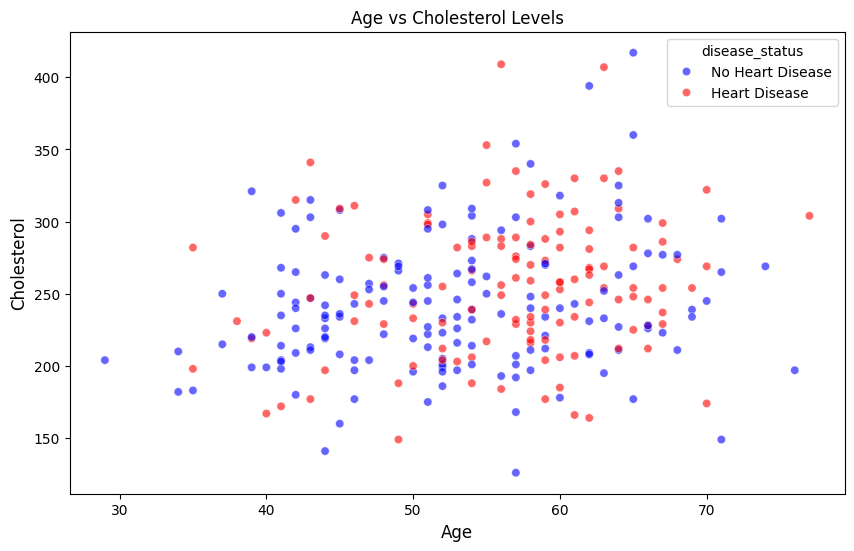

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

graph1_df = df.copy()
graph1_df = graph1_df.loc[(graph1_df['chol'] > 20 ) & (graph1_df['chol'] < 500)]
graph1_df = graph1_df.dropna(subset=['chol', 'age','num'])
chol_min = graph1_df['chol'].min()
print('The min for chol is : ', chol_min)
graph1_df['disease_status'] = graph1_df['num'].apply(lambda x: 'No Heart Disease' if x == 0 else 'Heart Disease')

graph1_df = graph1_df.loc[(graph1_df['age'] > 18) & (graph1_df['age'] < 110)]



plt.figure(figsize=(10, 6))


sns.scatterplot(data=graph1_df, x='age', y='chol', hue='disease_status',  palette={'No Heart Disease': 'blue', 'Heart Disease': 'red'}, alpha=0.6)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Age vs Cholesterol Levels', fontsize=12)
plt.show()

Purpose: the scatter plot shows the distribution of data between age and cholesterol levels. The points' colors also signify heart disease.

This figure demonstrates the relationship between cholesterol level and age for different levels of heart disease. By looking at this figure we can see that heart disease is concentrated from ages 40 to 70 and cholesterol level 200 to 320. As we know, the average healthy level for cholesterol in an individual is less than 200 mg/dl, however, from this scatter plot we see that most of the data falls outside that range. Even people without heart disease are also within that higher range of cholesterol levels, signifying that they most likely have either diabetic or other symptoms correlating to the high levels of cholesterol such as older age. We also note, a higher degree of red dots around the age of 60, indicating that older age increases the number and likelyhood of heart disease. The biggest takeaways from this graph are that heart disease has a higher likelyhood of occurring past the cholesterol level of 200 and around ages 60 and 70.

#**Distribution of ST Depression Histogram**

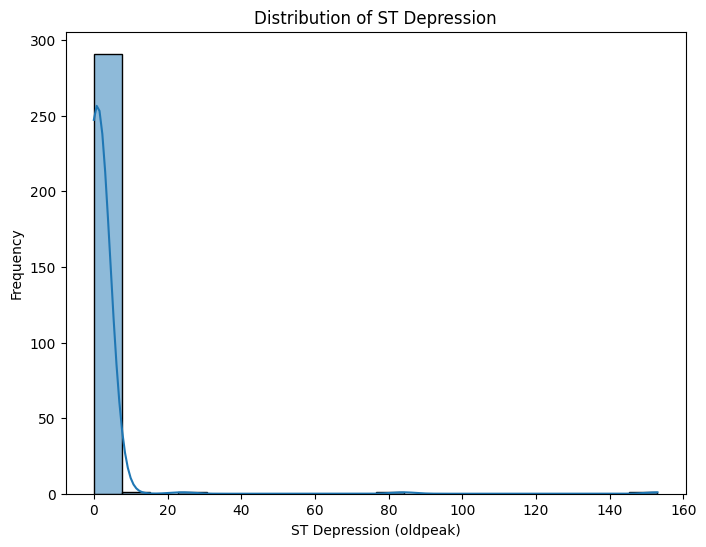

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['oldpeak'], bins=20, kde=True)
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Frequency')
plt.title('Distribution of ST Depression')
plt.show()

This histogram illustrates the distribution of ST depression (oldpeak), an indicator of potential heart abnormalities. It reveals a right-skewed distribution, with most values clustered around 0 to 1, suggesting that most individuals exhibit minimal or mild ST depression. A notable peak around 0 indicates a large number of individuals with no ST depression. Overall, the distribution of ST depression provides valuable insights into the dataset and its relationship with heart disease risk.

#**Cigarette Consumption vs Thalach(maximum heart rate) Bar Plot**

39     99.0
288    81.0
263    80.0
74     80.0
10     75.0
       ... 
254     0.0
258     0.0
262     0.0
285     0.0
3       0.0
Name: cigs, Length: 279, dtype: float64


<ipython-input-23-feb8bc0943cc>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_df = df_bar.groupby(['cigs_bin'])['thalach'].mean()


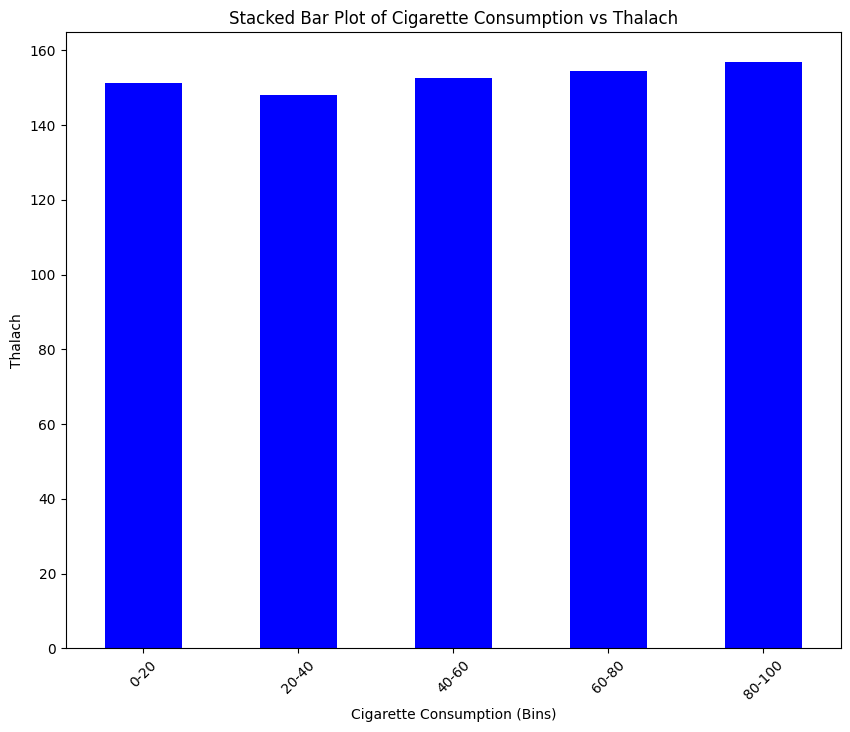

In [ ]:
from pandas.plotting import parallel_coordinates

df_bar = df.copy()
df_bar = df_bar.dropna(subset=['years', 'cigs'])
df_bar = df_bar.loc[df_bar['years'] < 100]
df_bar = df_bar.loc[df_bar['thalach'] <= 220]
df_bar = df_bar.sort_values(by="cigs", ascending=False)

print(df_bar['cigs'])

df_bar['cigs_bin'] = pd.cut(df_bar['cigs'], bins=[0, 20, 40, 60, 80, 100],
                            labels=["0-20", "20-40", "40-60", "60-80", "80-100"])

stacked_df = df_bar.groupby(['cigs_bin'])['thalach'].mean()

stacked_df.plot(kind="bar", stacked=True, color='blue', figsize=(10, 8))

plt.xlabel("Cigarette Consumption (Bins)")
plt.ylabel("Thalach")
plt.title("Stacked Bar Plot of Cigarette Consumption vs Thalach")
plt.xticks(rotation=45)
plt.show()

This bar plot provides insight into whether cigarette consumption affects **thalach** (maximum heart rate achieved). The data suggests that cigarette consumption does not significantly impact maximum heart rate.  

Across all bins, ranging from **0 to 100 cigarettes per day**, the distribution remains fairly consistent, indicating no clear trend or significant difference in maximum heart rate across varying levels of cigarette consumption. Based on this, we can conclude that **cigarette consumption does not have a major impact on maximum heart rate** and, therefore, may not be a key factor in heart health—at least in this context, as further explored in the spider chart below.

#**Health Factors by Heart Disease Level Spider Chart**

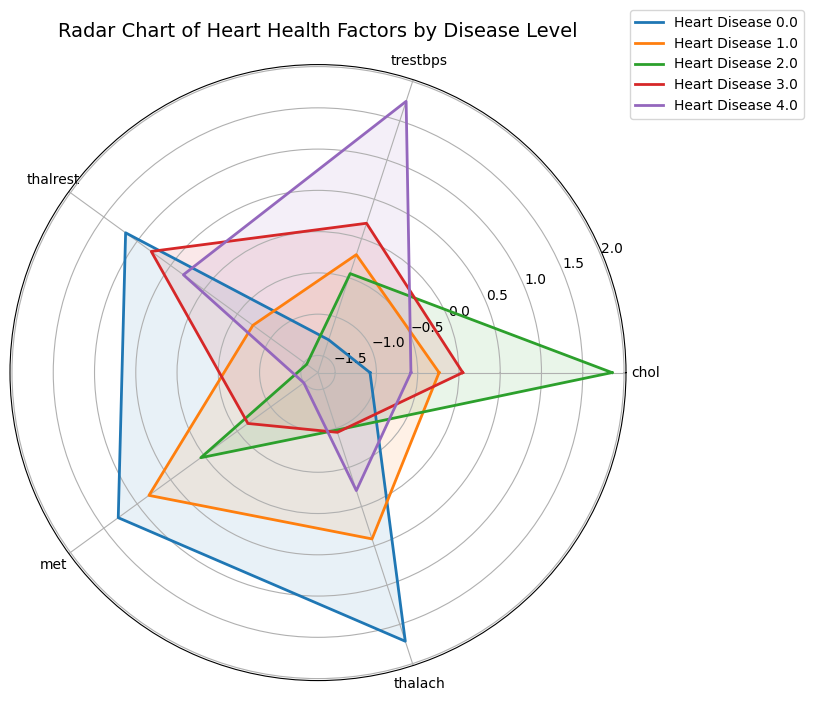

In [ ]:
from sklearn.preprocessing import StandardScaler

df_radar = df.copy()
df_radar = df_radar.loc[(df_radar['chol'] > 20 ) & (df_radar['chol'] < 1000)]

features = ['chol', 'trestbps', 'thalrest', 'met', 'thalach']
df_radar = df_radar.dropna(subset=features)

df_radar = df_radar.groupby('num')[features].mean()

scaler = StandardScaler()
df_radar[features] = scaler.fit_transform(df_radar[features])
values = df_radar.values

theta = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
theta += theta[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

for i, (label, row) in enumerate(df_radar.iterrows()):
    row_values = row.tolist()
    row_values += row_values[:1]
    ax.plot(theta, row_values, label=f"Heart Disease {label}", linewidth=2)
    ax.fill(theta, row_values, alpha=0.1)


ax.set_xticks(theta[:-1])
ax.set_xticklabels(features)
ax.set_title("Radar Chart of Heart Health Factors by Disease Level", fontsize=14, pad=20)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))





This spider chart illustrates the correlation between different features and heart disease levels. **Level 0** represents individuals with no heart disease, and based on the chart, they tend to have **higher maximum heart rate (thalach), metabolic equivalent (MET), and resting thallium stress test results (thalrest)**. This aligns with general medical knowledge, as individuals without heart disease are generally more physically capable.  

Examining heart disease levels **1-4**, we observe distinct patterns. **All groups with heart disease exhibit higher cholesterol levels compared to those without heart disease**, with **level 2** showing the most pronounced increase. Additionally, levels **1-4 consistently show lower values in thalach, MET, and thalrest**, reinforcing the idea that heart disease negatively affects these features.  

Another key trend is that individuals in groups **1-4 have higher resting blood pressure (trestbps) compared to level 0**, with **level 4 showing the highest values**. This supports the well-established link between **hypertension and an increased risk of heart disease**. Since level 0 has significantly lower trestbps, this further validates its connection to a lower risk of heart disease.  

Overall, this chart clearly demonstrates the impact of heart disease on these key features and highlights their importance in predicting heart disease.

The biggest takeaway from this graph is how the different features intertwine with heart disease and how they collectively contribute to identifying risk factors

#**Feature Distribution Stacked Bar Plot**

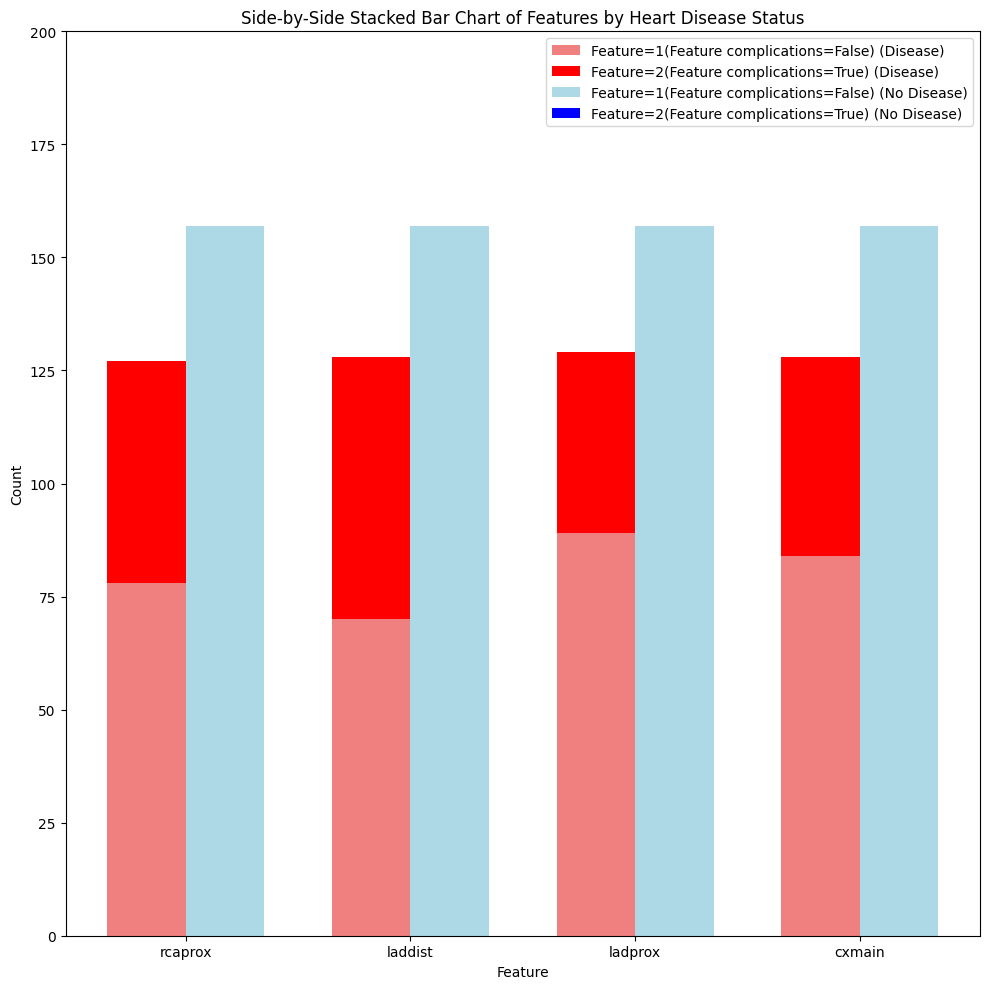

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stack_df = df.copy()
features = ['rcaprox', 'laddist', 'ladprox', 'cxmain']


stack_df = stack_df.dropna(subset=features)
stack_df = stack_df.dropna(subset='num')

stack_df['num'] = stack_df['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

pivot_0 = stack_df.pivot_table(index='num', values=features, aggfunc=lambda x: (x==1).sum()).T
pivot_1 = stack_df.pivot_table(index='num', values=features, aggfunc=lambda x: (x==2).sum()).T

fig, ax = plt.subplots(figsize=(10, 10))
width = 0.35
x = np.arange(len(features))

bottom_disease = np.zeros(len(features))
bar1 = ax.bar(x - width/2, pivot_0.loc[features, 'Disease'], width,
              label='Feature=1(Feature complications=False) (Disease)', color='lightcoral', bottom=bottom_disease)
bar2 = ax.bar(x - width/2, pivot_1.loc[features, 'Disease'], width,
              label='Feature=2(Feature complications=True) (Disease)', color='red', bottom=pivot_0.loc[features, 'Disease'])

bottom_no_disease = np.zeros(len(features))
bar3 = ax.bar(x + width/2, pivot_0.loc[features, 'No Disease'], width,
              label='Feature=1(Feature complications=False) (No Disease)', color='lightblue', bottom=bottom_no_disease)
bar4 = ax.bar(x + width/2, pivot_1.loc[features, 'No Disease'], width,
              label='Feature=2(Feature complications=True) (No Disease)', color='blue', bottom=pivot_0.loc[features, 'No Disease'])


ax.set_ylim(0, 200)

ax.set_xlabel('Feature')
ax.set_ylabel('Count')
ax.set_title('Side-by-Side Stacked Bar Chart of Features by Heart Disease Status')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

plt.tight_layout()
plt.show()

### Stacked Bar Plot Analysis: Feature Distribution in Heart Disease Prediction  

The stacked bar plot illustrates how different features are distributed among individuals with and without heart disease.  

One key observation is that for individuals without heart disease, **feature = 2** has no contribution to the count. This makes sense because the presence of **feature = 2** indicates current signs of heart disease, meaning it cannot appear in those without the condition.  

Looking at the cases of heart disease (red bars), **laddist** appears significantly more frequently than the other features, highlighting its importance in predicting heart disease. In contrast, **ladprox** seems to have a lesser impact. Additionally, **cxmain** and **rcaprox** are present in similar proportions among individuals with heart disease.  

The most important takeaway from this distribution is that **laddist has the strongest influence on predicting heart disease** and could be a crucial factor in optimizing model performance. Furthermore, all these features contribute to heart disease, as they never appear in individuals without the condition.

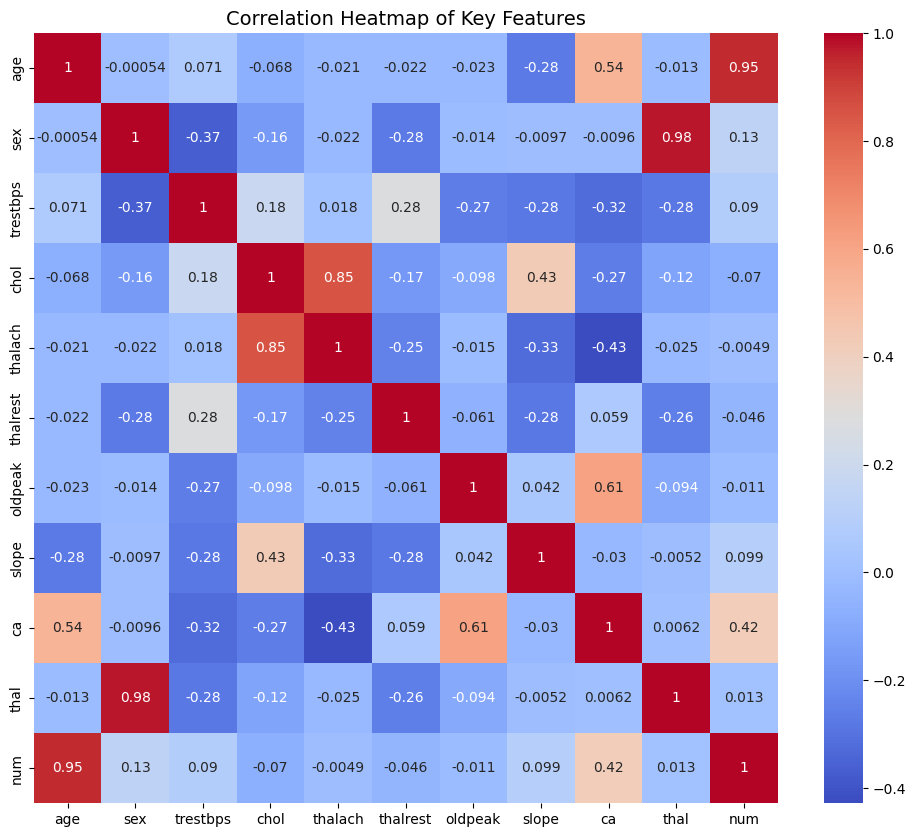

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert data to numeric. Bad data becomes Nan
df = df.apply(pd.to_numeric, errors='coerce')

corr_features = [
    'age', 'sex', 'trestbps', 'chol', 'thalach', 'thalrest', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

correlation_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features', fontsize=14)
plt.show()


***Explanation***  
Heatmap Purpose:
Represents the relationships between different numerical variables in the dataset.  
Positive Correlation - when a feature increases so does the other  
Negative Correlation - when a feature increases the other decreases  
Correlation close to 0 -little/no relationship between variables  

This heat map shows the strength of relationships between age, cholesterol, blood pressure, heart rate, and heart disease diagnosis (num). The most significant correlation shown is between age and heart disease diagnosis at 0.95. This implies that older individuals are more likely to have heart disease. Additionally, cholesterol (chol) and maximum heart rate achieved (thalach) show a strong correlation with a ratof 0.85 which means that these two factors typically increase together.  

The number of major vessels (ca) and ST depression induced by exercise (oldpeak) show a bit of a correlation with a value of 0.61 meaning that more blocked vessels are linked to greater ST depression. Lastly, the heatmap also shows weaker correlations, such as resting blood pressure (trestbps) and heart disease (num), suggesting that some traditionally monitored health indicators may not be strong standalone predictors of heart disease in this dataset.

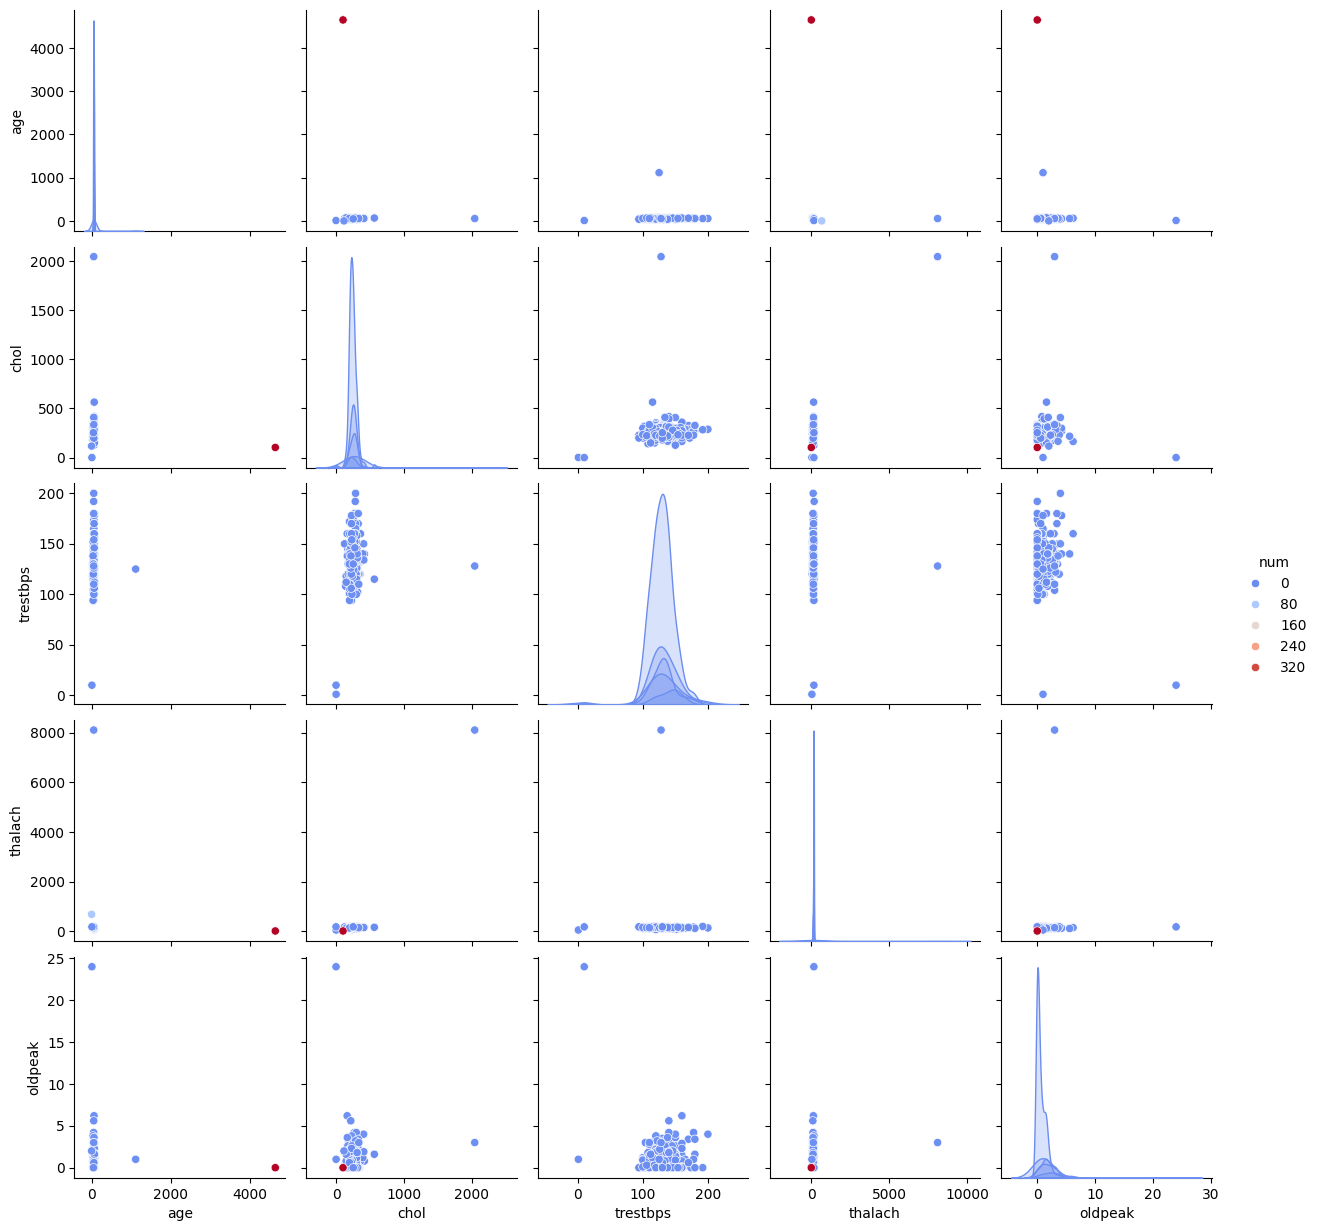

In [ ]:
sns.pairplot(df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'num']], hue='num', palette='coolwarm') #, height=3, aspect=1.5 (for readability)
plt.show()

***Explanation***  
This pair plot shows the relationship between different features related to heart disease.  

There are some extreme values in chol, thalach, and oldpeak, which could indicate errors in the dataset. These points, especially the red-colored ones that represent higher num values might represent patients with severe heart disease.  

Different shades in the scatter plots mean that heart disease severity (num) may be associated with specific ranges of certain features like cholesterol (chol) and resting blood pressure (trestbps).  
Some featureslike chol and trestbps show a bit of a clustering pattern. Others like thalach seem more scattered, indicating a weaker relationship.

# K Means Clustering

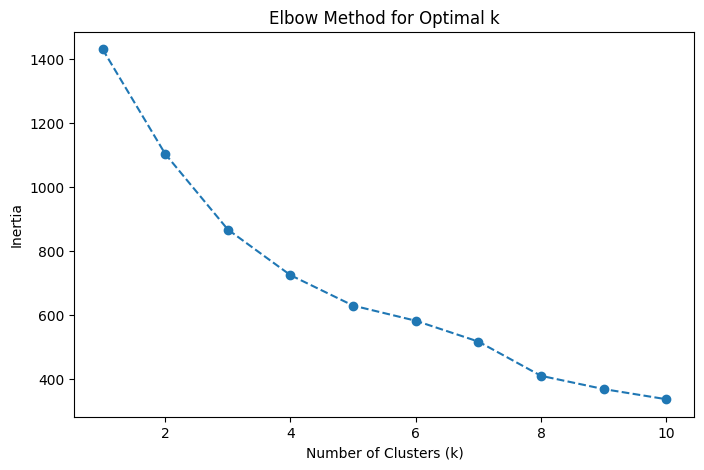

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
df_cluster = df[features].dropna()
df_cluster = df_cluster[(df_cluster['chol'] < 1000) & (df_cluster['thalach'] < 1000)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

***Explanation***  
The data is first cleaned to remove extreme values and then standardized to make sure all features have a mean of 0 and standard deviation of 1.
We can see using the elbow method that 5 is the "elbow" which means we should have 5 clusters.

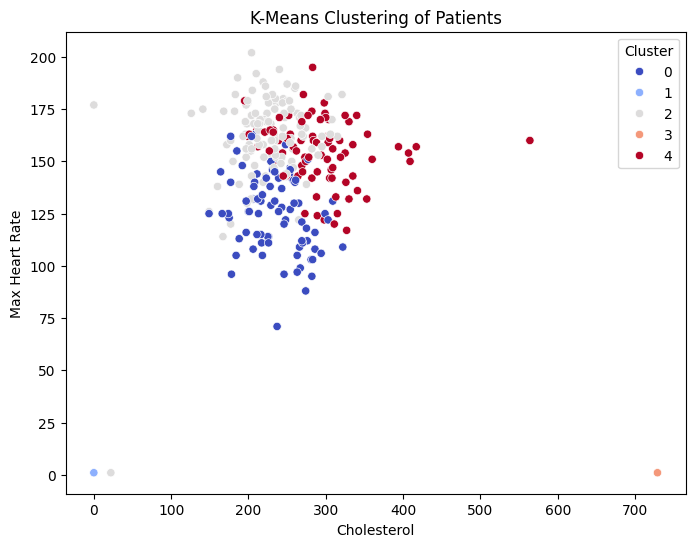

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

df.loc[df_cluster.index, 'cluster'] = df_cluster['cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cluster['chol'], y=df_cluster['thalach'], hue=df_cluster['cluster'], palette='coolwarm')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.title('K-Means Clustering of Patients')
plt.legend(title="Cluster")
plt.show()

***Explanation***  
Here we apply K-Means clustering to categorize patients based on their cholesterol levels (chol) and maximum heart rate (thalach). The scatter plot shows different patient clusters with varying cholesterol and heart rate levels.  

The majority of patients (blue clusters) have cholesterol levels around 150-250 and max heart rates between 100-200.

***Explanation***  
Here we apply K-Means clustering to categorize patients based on their cholesterol levels (chol) and maximum heart rate (thalach). The scatter plot shows different patient clusters with varying cholesterol and heart rate levels.  

The majority of patients (blue clusters) have cholesterol levels around 150-250 and max heart rates between 100-200.  

Cluster 0: Concentrated in the lower max heart rate range (100-150 bpm) and moderate cholesterol values (200-300 mg/dL).  

Cluster 1: Primarily in the lower heart rate range (75-150 bpm) with varying cholesterol levels.  

Cluster 2: Spread across the middle of the distribution. Has a balanced mix of cholesterol and max heart rate values.  

Cluster 3: Includes some outliers, such as the patient with extremely high cholesterol (700 mg/dL) and very low max heart rate (0-25 bpm).  

Cluster 4: Appears in the higher cholesterol range (250-400 mg/dL) and moderate-to-high heart rate (125-175 bpm).

The clustering reveals potential patterns in patient health, where some groups may be more at risk due to high cholesterol and low heart rate, while others might be in a more normal range.

# Agglomerative Clustering

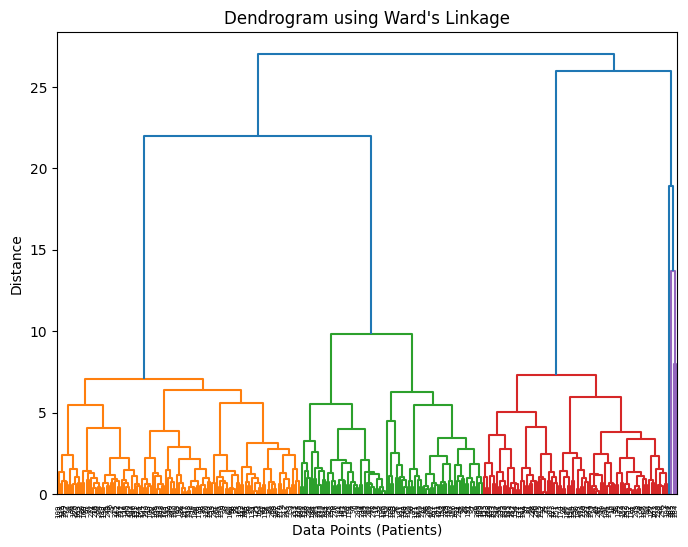

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X_scaled = scaler.fit_transform(df_cluster)

# Cluster using Ward's linkage
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(8,6))
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.xlabel('Data Points (Patients)')
plt.ylabel('Distance')
plt.title("Dendrogram using Ward\'s Linkage")
plt.show()


***Explanation***

This is the dendrogram produced from performing hierarchical clustering. In this case, we used agglomerative clustering with Ward's linkage as the distance measure. Ward's linkage was chosen as the distance measure because it minimizes variance within clusters, meaning that patients within a cluster have more similar health characteristics compared to those in other clusters. Looking at the dendrogram, we can see that there are 3 major clusters (orange, green, and red) before they are merged into the final cluster (blue). When these clusters merge into the final cluster, we can see that there is a large jump in the distances compared to where lower clusters merge. The large jump occurs around a distance of 10, meaning that clusters that form above this point may end up combining distinct groups. From this, we decide to choose a cutoff distance of 10.

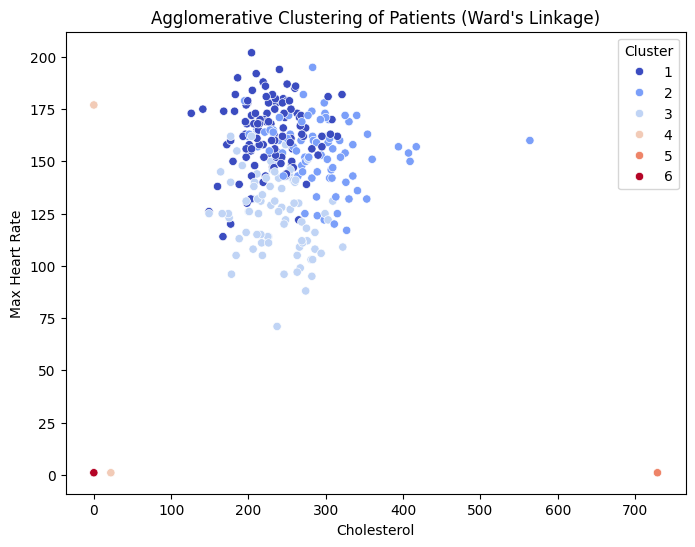

In [ ]:
features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
df_cluster = df[features].dropna().copy()
df_cluster = df_cluster[(df_cluster['chol'] < 1000) & (df_cluster['thalach'] < 1000)]

# Set cutoff-distance for clusters, determined/estimated from dendrogram
cutoff_distance = 10
df_cluster['cluster'] = fcluster(linkage_matrix, cutoff_distance, criterion='distance')

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cluster['chol'], y=df_cluster['thalach'], hue=df_cluster['cluster'], palette='coolwarm', legend="full")
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.title('Agglomerative Clustering of Patients (Ward\'s Linkage)')
plt.legend(title="Cluster")
plt.show()


***Explanation***

The above scatter plot visualizes the Agglomerative clustering of patients. Compared to the K-Means clustering, the chosen cutoff distance from the dendrogram results in 6 clusters instead of 5. Despite having an additional cluster, the clustering of the patients is very similar to the K-Means clustering.

Cluster 1 (Dark Blue): Patients are centered around maximum heart rates of ~160 bpm and cholesterol levels ranging ~150-250 mg/dL. Also has data points that are overlapped/extremities toward other clusters

Cluster 2 (Medium Blue): Patients are centered around maximum heart rates of ~130 bpm and cholesterol level ~200 mg/dL. Has an outlier around ~(230 mg/DL, 75 bpm)  

Cluster 3 (Light Blue): Centered around
heart rates of ~150 bpm and cholesterol levels of 300 mg/dL. Also has a noticeable outlier with a patient having cholesterol levels of ~600 mg/dL.

Cluster 4 (Light Orange): Outlier to the general spread of all patients. Has two patients who are very far apart from each other considering they are in the same cluster. Equal levels of cholesterol at ~25 mg/dL but at heart rates of ~0 bpm and ~175 bpm.

Cluster 5 (Dark Orange): Contains a single patient with extremely high levels of cholesterol at ~750 mg/dL and extremely low maximum heart rate. Also an outlier to the rest of the data.

Cluster 6 (Red): Contains a single patient with ~0 for both maximum heart rate and cholesterol levels.

Comparing the results of the Agglomerative clustering compared to K-Means clustering, the overall groupings are similar. Despite having 6 clusters instead of 5, clusters 1, 2, and 3 of the hierarchical clustering are extremely similar to clusters 2, 0, and 4 respectively. Since the natural clustering from Agglomerative clustering lines up with the fixed assumption of clusters from K-Means, this reinforces that cholesterol and max heart rate are key features in identifying patient health patterns.



# Random Forest Classifier

In [ ]:
# Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed['num'] = (df_imputed['num'] > 0).astype(int)

label_encoder = LabelEncoder()
for col in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[col] = label_encoder.fit_transform(df_imputed[col])

X = df_imputed.drop(columns=['num'])  # Features (all columns except 'num')
y = df_imputed['num']  # Target (Heart Disease diagnosis)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=1))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.93      1.00      0.96        26

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



The data was split 80:20 and Random Forest Classifier was applied. This resulted in a 98% accuracy which indicates that the model is performing extremely well in predicting heart disease. In class 0 (no heart disease), the model shows 100% precision with a 97% recall which indicates that it misses a few instances when identifying class 0 instances. For class 1 (heart disease), it produced a precision score of 96% and recall of 100% which shows that while it misses a few predictions, all instances that were predicted were correctly identified as class 1.

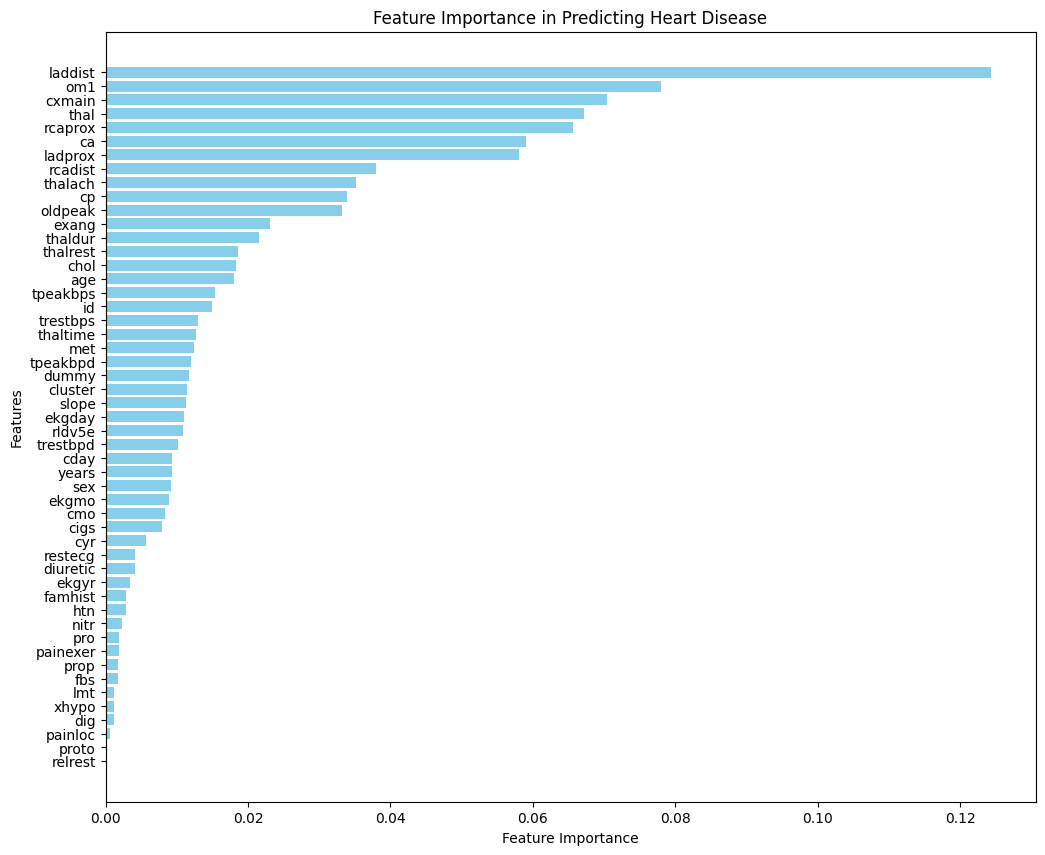

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Heart Disease')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

Looking at the feature importance for the Random Forest model, we see many variables that conribute to the prediction model. The variable, 'laddist', is the most important feature for heart disease prediction as it showed the highest feature importance compared to the other factors. The top 5 variables, which are the different vessels, indicate that arterial health is an important predictor for heart disease as expected.

# Decision Tree Classifier

In [ ]:
#Decision Tree Classifier

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Clean the data: Remove rows where 'num' is 357.0 or missing
df_cleaned = df[df['num'] != 357.0]
df_cleaned = df_cleaned.dropna(subset=['num'])

# Convert target variable 'num' to binary: 1 if greater than 0, else 0
df_cleaned['num'] = df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)

# Define features (X) and target (y) variables
X_cleaned = df_cleaned.drop(columns=['num'])  # Feature matrix after cleaning
y_cleaned = df_cleaned['num']  # Target variable after cleaning

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.89      0.94        27

    accuracy                           0.95        58
   macro avg       0.96      0.94      0.95        58
weighted avg       0.95      0.95      0.95        58



The Decision Tree model achieved an overall accuracy of 95% which isn't as good as the Random Forest model but still produced good performance. There is a good balance in precision, recall, and f1-score. For class 0, this model correctly identifies instances for this class but misses some in class 1 (as seen from the recall scores). The f1-scores for both classes are almost equally as high, indicating that the model performs well at distinguishing between both classes.

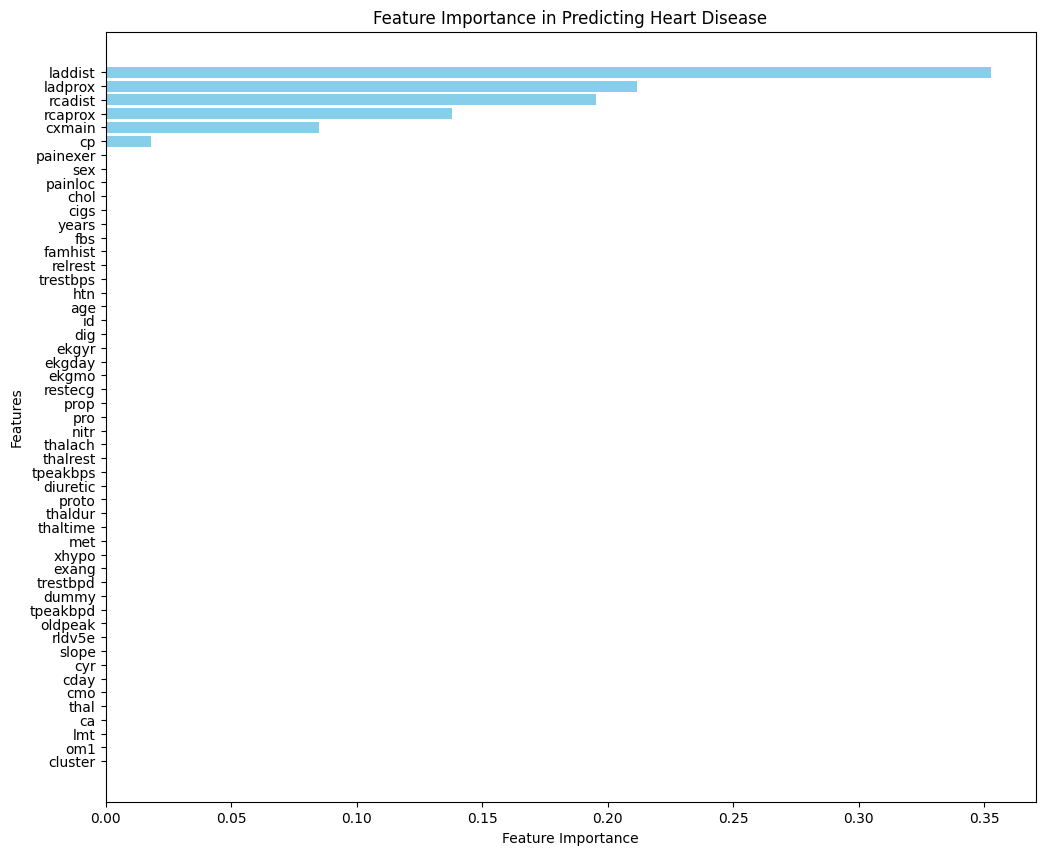

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Heart Disease')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

As opposed to the Random Forest Feature Importance, the Decision Tree Feature Importance shows only 6 variables that were important in predicting heart disease. Here, it shows that the type and number of major vessels are important in the prediction model which is synonymous with the feature importance of the Random Forest model.

# Logistic Regression

In [ ]:
#Logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Drop columns with missing values in specific columns
df_cleaned = df.drop(columns=['painloc', 'painexer', 'relrest', 'ekgday'])

df_cleaned = df_cleaned.apply(lambda x: x.fillna(x.mean()) if x.dtype in ['float64', 'int64'] else x, axis=0)
df_cleaned = df_cleaned.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x, axis=0)

df_cleaned['num'] = df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)

# Features and Target variable
X_cleaned = df_cleaned.drop(columns=['num'])  # Features
y_cleaned = df_cleaned['num']  # Target variable

# Scale the features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

# Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions
y_pred = logreg_model.predict(X_test)

# Evaluation metrics for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        34
           1       0.70      0.73      0.72        26

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



The logistic regression prediction model achieved an overall accuracy of 75% which is moderate. For class 0, a precision score of 81% and recall of 74% signifies that it correctly identifies most instances for class 0 but misses a few. For class 1, the precision score of 69% and recall of 77% shows that while it does correctly identify the class 1 instances, it also makes more false positive predictions.

# Conclusion

In this project, I examined different models such as KMeans, RandomForestRegressor, Logistic Regression, and Decision Trees to predict the likelihood of an individual having heart disease. I first fetched data from a raw, unprocessed binary file and aligned column names with the data. The cleaning process focused on removing any unnecessary columns that were either empty or irrelevant. Additionally, I replaced the -9 values in other columns with NaN, as dropping these rows would have resulted in losing too much data for exploratory data analysis (EDA). After cleaning, I investigated how different features impacted the likelihood of heart disease and whether they correlated with each other. Through EDA, I identified key variables like cholesterol levels, age, resting blood pressure, and maximum heart rate (thalach), which showed strong correlations with heart disease. For the Decision Tree model specifically, I created a feature importance graph, which demonstrated that certain features had more influence on predictions. After training and evaluating the models, I assessed their performance using accuracy, precision, recall, and F1-score. In comparison to the UCI case, my Random Forest model achieved the highest overall accuracy at 98%. The other models performed well too, with accuracy above 70%, indicating their competence and capability in predicting heart disease.